In [1]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
df_diabetics.drop_duplicates()
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Визуализация выбросов с помощью прямоугольного графика
Он эффективно фиксирует сводку данных с помощью всего лишь простого блока и усов. Boxplot суммирует выборочные данные с использованием 25-го, 50-го и 75-го процентилей. Можно просто получить представление (квартили, медиану и выбросы) о наборе данных, просто взглянув на его диаграмму.

<Axes: >

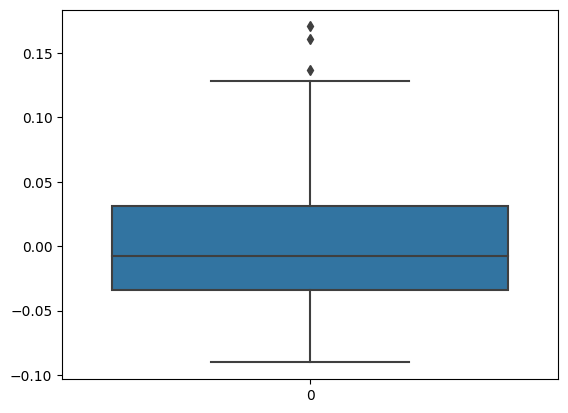

In [2]:
import seaborn as sns
sns.boxplot(df_diabetics['bmi'])

На приведенном выше графике хорошо видно, что значения выше 10 действуют как выбросы.

In [3]:
import numpy as np
print(np.where(df_diabetics['bmi']>0.12))

(array([ 32, 145, 256, 262, 366, 367, 405]),)


Визуализация выбросов с помощью диаграммы рассеяния.

Он используется, когда у вас есть сопряженные числовые данные и когда ваша зависимая переменная имеет несколько значений для каждой независимой переменной чтения, или при попытке определить взаимосвязь между двумя переменными. В процессе использования точечной диаграммы ее также можно использовать для обнаружения выбросов.

Для построения точечной диаграммы требуются две переменные, которые каким-то образом связаны друг с другом. Итак, здесь используются "Доля акров, не связанных с розничной торговлей, на город" и "Ставка налога на недвижимость в размере полной стоимости за 10 000 долларов США", названия столбцов которых - “ПРОМЫШЛЕННОСТЬ” и “НАЛОГ” соответственно.

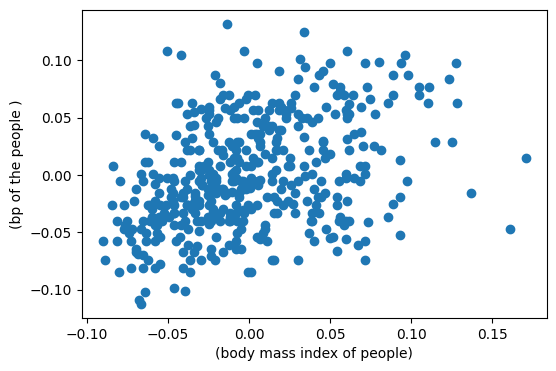

In [4]:
# Scatter plot
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df_diabetics['bmi'],df_diabetics['bp'])

# x-axis label
ax.set_xlabel('(body mass index of people)')

# y-axis label
ax.set_ylabel('(bp of the people )')
plt.show()

Глядя на график, можно сделать вывод, что большинство точек данных находятся в нижнем левом углу графика, но есть несколько точек, которые находятся точно напротив, что является верхним правым углом графика. Эти точки в правом верхнем углу можно рассматривать как выбросы.

Используя аппроксимацию, можно сказать, что все те точки данных, которые имеют значения x> 20 и y> 600, являются выбросами. Следующий код может получить точное положение всех тех точек, которые удовлетворяют этим условиям.

Выбросы в столбцах BMI и BP объединены

In [5]:
print(np.where((df_diabetics['bmi']>0.12) & (df_diabetics['bp']<0.8)))

(array([ 32, 145, 256, 262, 366, 367, 405]),)


Z-оценка

Z-оценка также называется стандартной оценкой. Это значение / оценка помогает понять, насколько далека точка данных от среднего значения. И после настройки порогового значения можно использовать значения z баллов точек данных для определения выбросов.

In [6]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_diabetics['age']))
print(z)

0      0.800500
1      0.039567
2      1.793307
3      1.872441
4      0.113172
         ...   
437    0.876870
438    0.115937
439    0.876870
440    0.956004
441    0.956004
Name: age, Length: 442, dtype: float64


Приведенный выше вывод - это всего лишь снимок части данных; фактическая длина списка (z) равна 506, то есть количеству строк. Он выводит значения z-score для каждого элемента данных столбца

Теперь для определения порогового значения выбросов выбирается значение, которое обычно равно 3,0. Поскольку 99,7% точек данных лежат в пределах + /-3 стандартного отклонения (с использованием метода распределения по Гауссу).

Строки, где значение Z больше 2

In [7]:
threshold = 2

# Position of the outlier
print(np.where(z > 2))

(array([ 10,  26,  41,  77,  79, 106, 131, 204, 223, 226, 242, 311, 321,
       344, 374, 402]),)


IQR (межквартильный диапазон)
IQR (межквартильный диапазон) Межквартильный подход к поиску выбросов является наиболее часто используемым и наиболее надежным подходом, используемым в области исследований.

In [8]:
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

0.06520763046978838


Полный код: обнаружение выбросов с помощью IQR и их удаление.

In [9]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes = load_diabetes()

# Create the dataframe
column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes .columns = column_name
df_diabetes .head()
print("Old Shape: ", df_diabetes.shape)

''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = df_diabetes['bmi'].quantile(0.25)
Q3 = df_diabetes['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetes['bmi']>=upper)[0]
lower_array = np.where(df_diabetes['bmi']<=lower)[0]

# Removing the outliers
df_diabetes.drop(index=upper_array, inplace=True)
df_diabetes.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_diabetes.shape)

Old Shape:  (442, 10)
New Shape:  (439, 10)


Помогайка

In [ ]:
plt.hist(data['целевой признак'], bins='count')

In [ ]:
dataset.isnull().sum()

In [ ]:
mappix = { '1': 1, '2': 2, '3': 3 }
data['123'] = data['123'].map(mappix)